In [1]:
using CairoMakie
using GraphMakie
using Graphs
using GraphMakie.NetworkLayout
using Interact
# Makie.inline!(true)


WebIO._IJuliaInit()

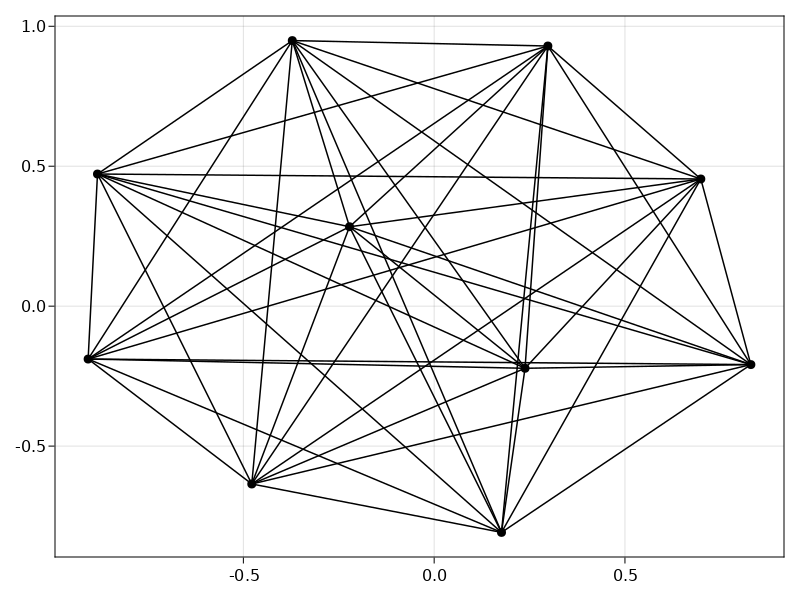

In [2]:
g = complete_graph(10)
graphplot(g)

In [ ]:

g = smallgraph(:cubical)
elabels_shift = [0.5 for i in 1:ne(g)]
elabels_shift[[2,7,8,9]] .= 0.3
elabels_shift[10] = 0.25
graphplot(g; layout=Spring(dim=3, seed=5),
          elabels="Edge ".*repr.(1:ne(g)),
          elabels_textsize=12,
          elabels_opposite=[3,5,7,8,12],
          elabels_shift,
          elabels_distance=3,
          arrow_show=true,
          arrow_shift=0.9,
          arrow_size=15)

In [ ]:
using JSServe
Page(exportable=true, offline=true)

In [ ]:
using WGLMakie
WGLMakie.activate!()
# Makie.inline!(true)

set_theme!(resolution=(800, 600))
g = smallgraph(:dodecahedral)
graphplot(g, layout=Spring(dim=3), node_size=100)

In [ ]:
using CairoMakie
using GraphMakie
using Graphs
using CairoMakie.Colors
WGLMakie.activate!()

g = wheel_graph(10)
f, ax, p = graphplot(g,
                     edge_width = [2.0 for i in 1:ne(g)],
                     edge_color = [colorant"gray" for i in 1:ne(g)],
                     node_size = [10 for i in 1:nv(g)],
                     node_color = [colorant"red" for i in 1:nv(g)])
hidedecorations!(ax); hidespines!(ax)
ax.aspect = DataAspect()
display(ax)

In [ ]:
function node_drag_action(state, idx, event, axis)
    p[:node_pos][][idx] = event.data
    p[:node_pos][] = p[:node_pos][]
end
ndrag = NodeDragHandler(node_drag_action)
register_interaction!(ax, :ndrag, ndrag)
display(ax)

In [ ]:
ax


In [ ]:
mutable struct EdgeDragAction
    init::Union{Nothing, Point2f} # save click position
    src::Union{Nothing, Point2f}  # save src vertex position
    dst::Union{Nothing, Point2f}  # save dst vertex position
    EdgeDragAction() = new(nothing, nothing, nothing)
end
function (action::EdgeDragAction)(state, idx, event, axis)
    edge = collect(edges(g))[idx]
    if state == true
        if action.src===action.dst===action.init===nothing
            action.init = event.data
            action.src = p[:node_pos][][edge.src]
            action.dst = p[:node_pos][][edge.dst]
        end
        offset = event.data - action.init
        p[:node_pos][][edge.src] = action.src + offset
        p[:node_pos][][edge.dst] = action.dst + offset
        p[:node_pos][] = p[:node_pos][] # trigger change
    elseif state == false
        action.src = action.dst = action.init =  nothing
    end
end
edrag = EdgeDragHandler(EdgeDragAction())
register_interaction!(ax, :edrag, edrag)

In [ ]:
ax